In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from joblib import Parallel, delayed
from scipy.stats import binom
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")

In [3]:
cards = np.array([-10, -5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, np.inf, -np.inf])

In [4]:
def sim(m0=True, qm=True, seen=None, players=5):

    seen = np.array(seen)
    x = np.random.choice(
        np.setdiff1d(cards, seen), size=players + 1 - seen.size, replace=False
    )
    x = np.append(x, seen)

    if np.inf in x:  # question mark, add another random card
        if not qm:
            return np.inf
        extra = np.random.choice(np.setdiff1d(cards, x))
        x = x[x != np.inf]
        x = np.append(x, extra)

    if -np.inf in x:  # max 0, deletes the maximum
        if not m0:
            return -np.inf
        x = x[x != -np.inf]
        x = x[x != np.max(x)]

    return x.sum()

In [5]:
games = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0])
(games == 1).sum(), (games == 0).sum()

(3, 7)

In [22]:
seen = [3, 5, 6, -10, -np.inf]
players = 5
nsims = 100_000
x = np.array(
    Parallel(n_jobs=-1)(
        delayed(sim)(seen=seen, players=players) for _ in tqdm(range(nsims))
    )
)

  0%|          | 0/100000 [00:00<?, ?it/s]

50.0%: 2.0
guess=15: 1.0 bust


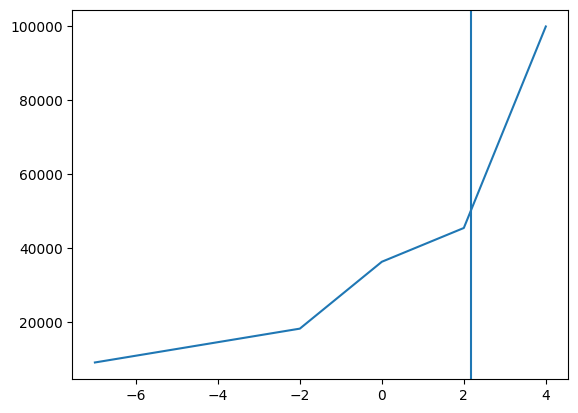

In [23]:
val, counts = np.unique(x, return_counts=True)
ccounts = np.cumsum(counts)
plt.plot(val, ccounts)

alpha = 0.5
gx = np.interp(alpha * nsims, ccounts, val)
plt.axvline(gx)
print(f"{alpha*100}%:", np.around(gx))

beta = 15
gy = np.interp(beta, val, ccounts)
print(f"guess={beta}:", gy / nsims, "bust")

In [24]:
x.mean(), x.std()

(1.46036, 3.4407802415149966)